# TASK 1: Data Generation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Data Generation class

In [ ]:
class Poisson_data_generator():

    def __init__(self, N, K, random_seed):
        # grid discretization parameter
        self.N = N
        # set number of frequency modes
        self.K = K
        # set user decided random seed for reproducibility
        np.random.seed(random_seed)
        # generate random expansion coefficients
        self.A = np.random.normal(size=(K,K))
        # generate mesh 
        self.x = np.linspace(0, 1, N)
        self.y = np.linspace(0, 1, N)
        self.XX, self.YY = np.meshgrid(self.x, self.y)

    def forcing_term(self, x, y):
        f = 0
        for i in range(1,self.K+1) :
            for j in range(1,self.K+1):
                f += self.A[i-1, j-1]*np.sqrt(i**2 + j**2)*np.sin(np.pi*i*x)*np.sin(np.pi*j*y)
        return np.pi/(self.K**2)*f
    
    def exact_solution(self, x, y):
        u = 0
        for i in range(1,self.K+1):
            for j in range(1,self.K+1):
                u += self.A[i-1, j-1]*(i**2 + j**2)**(-0.5)*np.sin(np.pi*i*x)*np.sin(np.pi*j*y)
        return 1/(np.pi*(self.K**2))*u
    
    def generate(self):
        return self.forcing_term(self.XX, self.YY), self.exact_solution(self.XX, self.YY)


## Actual Data Generation

In [16]:
# seeds for random number generator
seeds = [1, 2, 3]
# increasing complexities
K = [1, 4, 8, 16]
# set mesh resolution
N = 256

poisson_data = np.empty((3, 4, 2, N, N))

for i, s in enumerate(seeds):
    for j, k in enumerate(K):
        generator = Poisson_data_generator(N, k, s)
        force, sol = generator.generate()
        poisson_data[i,j,0] = force
        poisson_data[i,j,1] = sol
        

## Plot Data

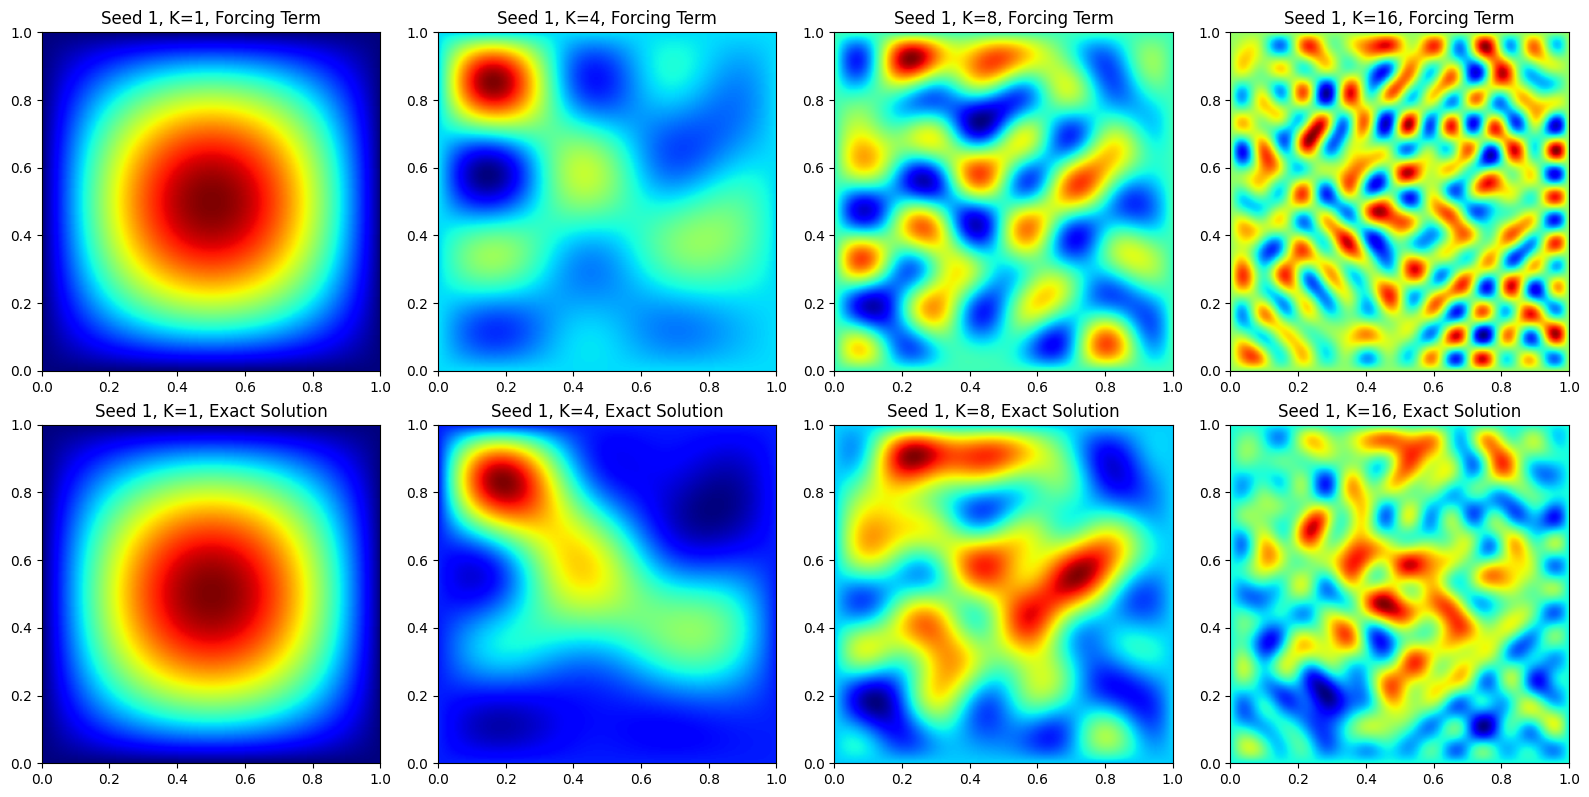

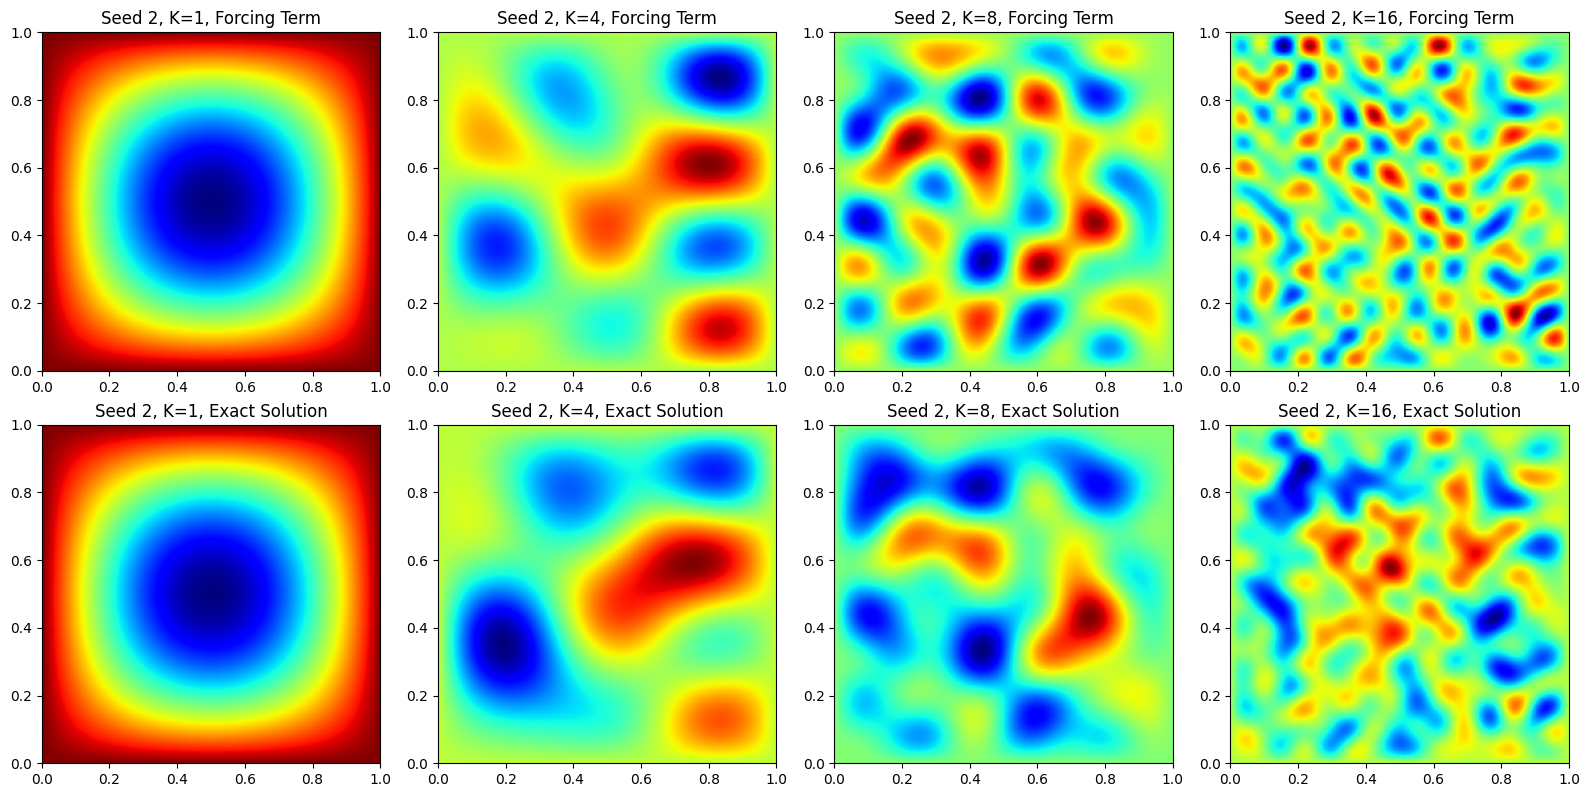

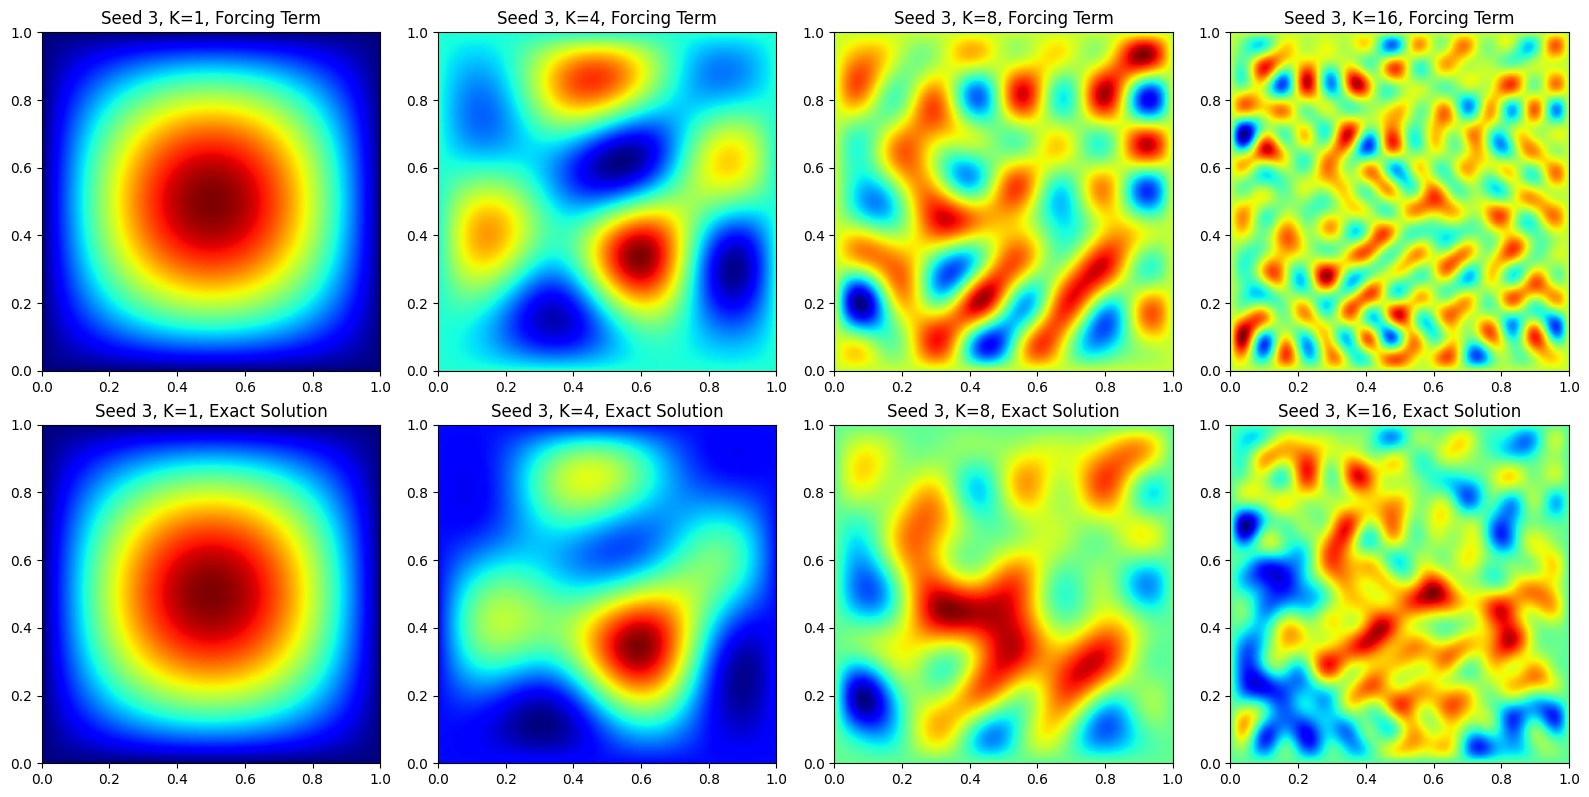

In [19]:
# for each seed, make a plot showing the forcing term and exact solution for K=1,4,8,16
# using color map jet
for i, s in enumerate(seeds):
    fig, axs = plt.subplots(2, 4, figsize=(16, 8))
    for j, k in enumerate(K):
        axs[0, j].imshow(poisson_data[i,j,0], extent=[0,1,0,1], origin='lower', cmap='jet')
        axs[0, j].set_title(f'Seed {s}, K={k}, Forcing Term')
        axs[1, j].imshow(poisson_data[i,j,1], extent=[0,1,0,1], origin='lower', cmap='jet')
        axs[1, j].set_title(f'Seed {s}, K={k}, Exact Solution')
    plt.tight_layout()
    plt.show()

